# Exploratory Data Analysis (Part 1 of 2)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import time

# Bitcoin

Let's start with the price of Bitcoin, measured by the Bitcoin Price Index.

In [2]:
btc = pd.read_csv('bpi.csv')

In [3]:
def str_to_time(elem):
    day = datetime.datetime.strptime(elem, '%Y-%m-%d')
    return day

btc['Date'] = btc['Date'].apply(str_to_time)
btc = btc.set_index('Date')

In [4]:
import matplotlib
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 22}

matplotlib.rc('font', **font)

D:\ProgramFiles\Anaconda\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Price in USD')

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


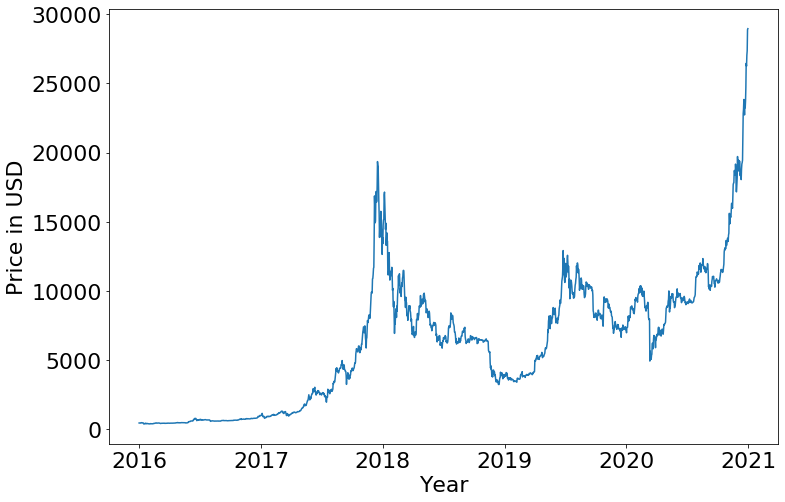

In [5]:
fig = plt.figure(figsize=(12,8))
plt.plot(btc['BPI'])#, btc['BPI'])
#plt.title('The price of Bitcoin in USD')
plt.xlabel('Year')
plt.ylabel('Price in USD')


Text(0, 0.5, 'Price in USD (log scale)')

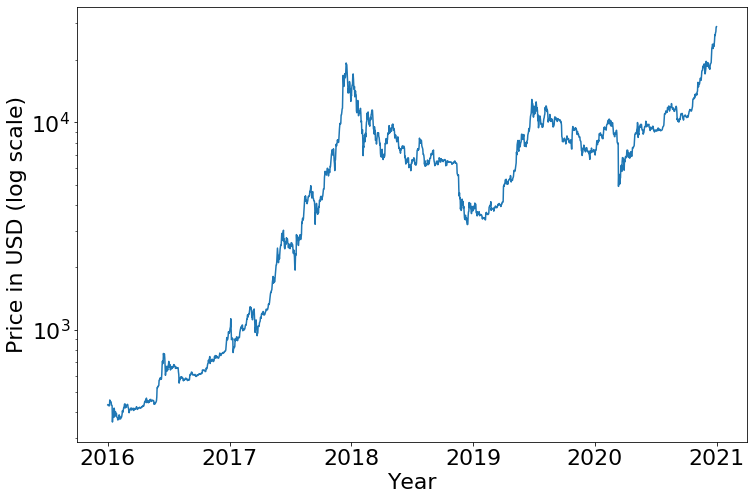

In [6]:
fig = plt.figure(figsize=(12,8))
plt.plot(btc['BPI'])
plt.yscale('log')
plt.xlabel('Year')
plt.ylabel('Price in USD (log scale)')

So, what can be learned so far? 
- A relatively boring period until beginning of 2017, then a wild ride with rapid increase until the beginning of 2018.
- Bitcoin hit an ATH
- Then, a very rapid fallback, followed by a long and sustained period of declining prices.
- Some ground was won during 2019.
- A bumpy ride in 2019 - 2020, but a huge spike towards the end of 2021.

This is probably important to know for the rest of the analysis.

# Final Dataset

In [7]:
df = pd.read_csv('df_final.csv')

In [8]:
df

,id,timestamp,author,score,comments,title,text,Time,Day
0,3yyux2,1451606523,HodlDwon,1,0,Toomim BTCC Comment,NaN,2016-01-01 00:02:03,2016-01-01
1,3yyvmp,1451606917,[deleted],63,149,They think Satoshi was wrong,[deleted],2016-01-01 00:08:37,2016-01-01
2,3yyx1b,1451607665,Bonleta,6,0,Bitcoin crowned best-performing currency of 2015,NaN,2016-01-01 00:21:05,2016-01-01
3,3yyyoz,1451608583,wakka54,2,3,If there an automated program to search a hard...,I remember mining in 2010 but quit because it ...,2016-01-01 00:36:23,2016-01-01
4,3yyyqr,1451608613,camponez,1,3,Happy New 2016 FIAT!,NaN,2016-01-01 00:36:53,2016-01-01
...,...,...,...,...,...,...,...,...,...
574618,ko0wkc,1609458770,BitcoinIsEasy,1,0,Look like for Idiots but its Amazing,NaN,2020-12-31 23:52:50,2020-12-31
574619,ko0xpi,1609458893,idknooneknowsme,1,5,How to recover bitcoin,"So I’m actually not a n00b at all, I’m holding...",2020-12-31 23:54:53,2020-12-31
574620,ko0ycw,1609458963,Independent-Front860,1,0,"Defending Japan, the land of Satoshi Nakamoto ...",NaN,2020-12-31 23:56:03,2020-12-31
574621,ko0yoo,1609458998,18gorrillas,1,1,I hear “down the rabbit hole” all the time.......,NaN,2020-12-31 23:56:38,2020-12-31


In [9]:
df['id'] = df['id'].astype(str)
df['timestamp'] = df['timestamp'].astype(int)
df['author'] = df['author'].astype(str)
df['score'] = df['score'].astype(int)
df['comments'] = df['comments'].astype(int)
df['title'] = df['title'].astype(str)
df['text'] = df['text'].astype(str)
df['Time'] = pd.to_datetime(df['Time'])
df['Day'] = pd.to_datetime(df['Day'])

In [10]:
df

,id,timestamp,author,score,comments,title,text,Time,Day
0,3yyux2,1451606523,HodlDwon,1,0,Toomim BTCC Comment,nan,2016-01-01 00:02:03,2016-01-01
1,3yyvmp,1451606917,[deleted],63,149,They think Satoshi was wrong,[deleted],2016-01-01 00:08:37,2016-01-01
2,3yyx1b,1451607665,Bonleta,6,0,Bitcoin crowned best-performing currency of 2015,nan,2016-01-01 00:21:05,2016-01-01
3,3yyyoz,1451608583,wakka54,2,3,If there an automated program to search a hard...,I remember mining in 2010 but quit because it ...,2016-01-01 00:36:23,2016-01-01
4,3yyyqr,1451608613,camponez,1,3,Happy New 2016 FIAT!,nan,2016-01-01 00:36:53,2016-01-01
...,...,...,...,...,...,...,...,...,...
574618,ko0wkc,1609458770,BitcoinIsEasy,1,0,Look like for Idiots but its Amazing,nan,2020-12-31 23:52:50,2020-12-31
574619,ko0xpi,1609458893,idknooneknowsme,1,5,How to recover bitcoin,"So I’m actually not a n00b at all, I’m holding...",2020-12-31 23:54:53,2020-12-31
574620,ko0ycw,1609458963,Independent-Front860,1,0,"Defending Japan, the land of Satoshi Nakamoto ...",nan,2020-12-31 23:56:03,2020-12-31
574621,ko0yoo,1609458998,18gorrillas,1,1,I hear “down the rabbit hole” all the time.......,nan,2020-12-31 23:56:38,2020-12-31


# Score

Text(0, 0.5, 'Score')

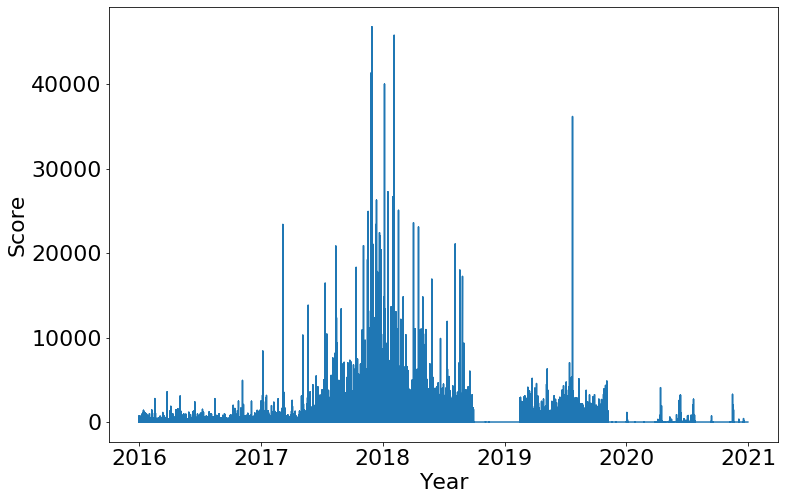

In [11]:
fig = plt.figure(figsize=(12,8))
plt.plot(df['Day'], df['score'])
plt.xlabel('Year')
plt.ylabel('Score')

There is a huge problem here. 
- Crawler is not accurate
- Score can change over time
- most recent threads are very inaccurate
- Older threads are mroe accurate
- Open issue on GitHub

# Comments

Text(0, 0.5, 'Comments')

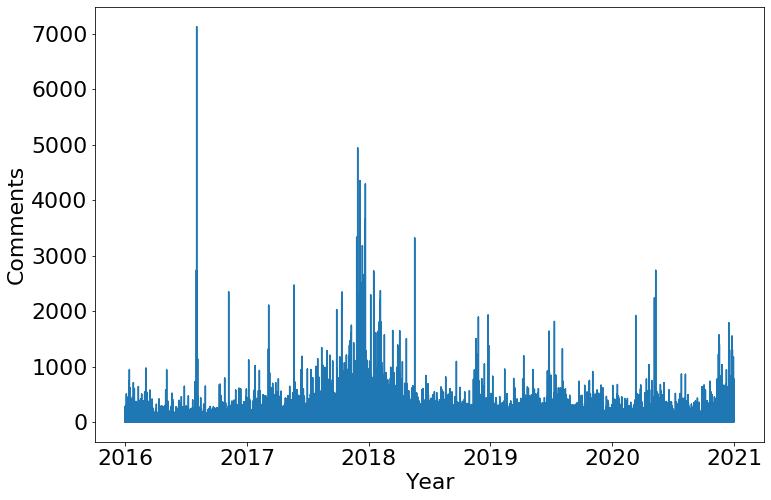

In [12]:
fig = plt.figure(figsize=(12,8))
plt.plot(df['Day'], df['comments'])
plt.xlabel('Year')
plt.ylabel('Comments')

Much more accurate, but a few things to be mentioned:
- The one spike in 2016 is a total outlier. 
- Should be treated with caution.
- One can observe a co-movement with the price of bitcoin to a certain extent.
- However, in the end it gets inaccurate.
- Could be because there is still discussion going on, the crawler hasn't updated yet
- Neverthelesss, the comments seem to be of better reliability than the scores

# Authors

In [13]:
df['author'].value_counts()

[deleted]          46343
ms3776500           1703
cryptodailynews     1643
Daveliuz            1522
firecrypto          1470
                   ...  
RyanWithOak            1
MasterCryptKeep        1
monzzter221            1
yosh579                1
officenarwhal          1
Name: author, Length: 170527, dtype: int64

In [14]:
df['author'].value_counts()[0]/df['author'].value_counts().sum()

0.08064939969336417

In [15]:
# So, most comments come from accounts that are already deleted. What happens if we take them out? 

In [16]:
author_df = df[df['author'] != '[deleted]']['author']

In [17]:
counts_df = author_df.value_counts().value_counts()

In [18]:
cdf = counts_df.sort_index()
cdf = cdf.reset_index()
cdf = cdf.rename(columns={'index':'Threads'})

In [19]:
cdf

,Threads,author
0,1,111170
1,2,25181
2,3,10557
3,4,5733
4,5,3587
...,...,...
275,1450,1
276,1470,1
277,1522,1
278,1643,1


In [20]:
cdf['total_threads'] = cdf['Threads'] * cdf['author']

cumulative = []
threads = 0
totals = cdf['total_threads'].sum()
for i in range(cdf.shape[0]):
    threads += cdf['total_threads'].iloc[i]
    cumulative.append(threads / totals)
cdf['cumulative'] = cumulative    

In [21]:
cdf[cdf['Threads']==8]

,Threads,author,total_threads,cumulative
7,8,1280,10240,0.513523


In [22]:
ca = []
cap = []
captot = cdf['author'].sum()
cas = 0
for i in range(cdf.shape[0]):
    cas += cdf['author'].iloc[i]
    ca.append(cas)
    cap.append(cas/captot)

cdf['cumulative_authors'] = ca
cdf['cumulative_authors_pct'] = cap
cdf

,Threads,author,total_threads,cumulative,cumulative_authors,cumulative_authors_pct
0,1,111170,111170,0.210438,111170,0.651924
1,2,25181,50362,0.305770,136351,0.799591
2,3,10557,31671,0.365721,146908,0.861499
3,4,5733,22932,0.409130,152641,0.895119
4,5,3587,17935,0.443079,156228,0.916154
...,...,...,...,...,...,...
275,1450,1,1450,0.988003,170522,0.999977
276,1470,1,1470,0.990785,170523,0.999982
277,1522,1,1522,0.993666,170524,0.999988
278,1643,1,1643,0.996776,170525,0.999994


In [23]:
pd.DataFrame(cdf[cdf['cumulative']>= 0.5].iloc[0]).transpose()

,Threads,author,total_threads,cumulative,cumulative_authors,cumulative_authors_pct
7,8.0,1280.0,10240.0,0.513523,161707.0,0.948284


In [24]:
1 - cdf['cumulative'].iloc[-10]

0.024884530930567084

Text(0, 0.5, 'Number of Authors')

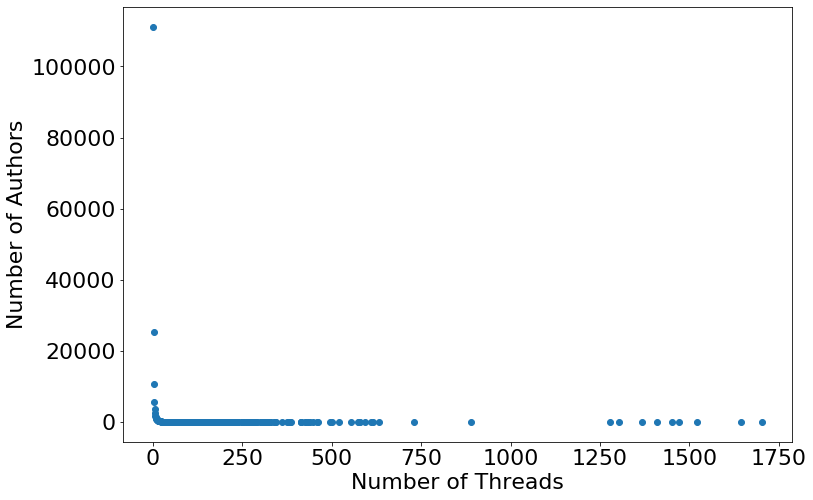

In [25]:
fig = plt.figure(figsize=(12,8))
plt.scatter(cdf['Threads'], cdf['author'])
plt.xlabel('Number of Threads')
plt.ylabel('Number of Authors')

Text(0, 0.5, 'Cumulative Percentage')

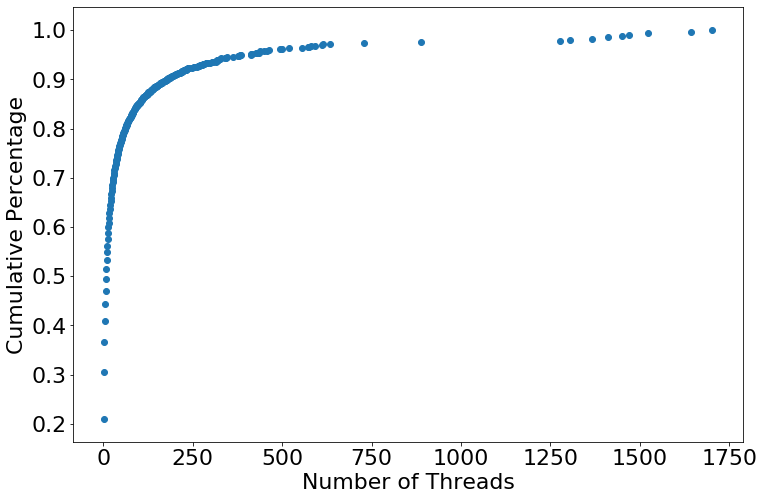

In [26]:
fig = plt.figure(figsize=(12,8))
plt.scatter(cdf['Threads'], cdf['cumulative'])
plt.xlabel('Number of Threads')
plt.ylabel('Cumulative Percentage')

Text(0, 0.5, 'Cumulative Threads')

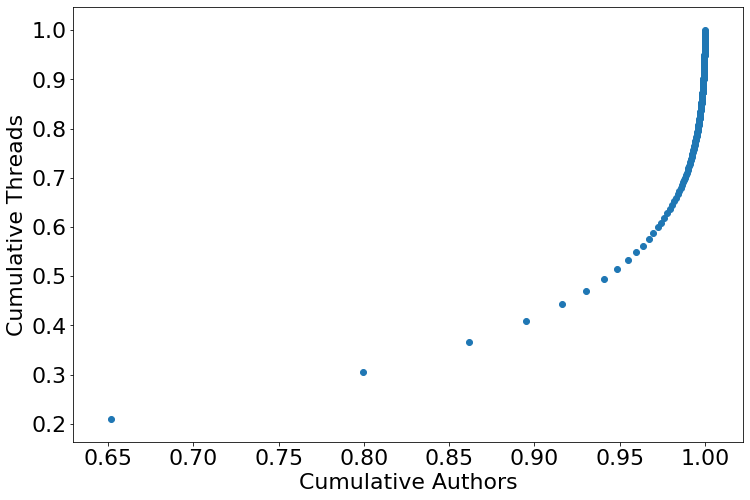

In [27]:
fig = plt.figure(figsize=(12,8))
plt.scatter(cdf['cumulative_authors_pct'], cdf['cumulative'])
plt.xlabel('Cumulative Authors')
plt.ylabel('Cumulative Threads')

What can be learned from here: 
- Highly skewed distribution, a few authors that write a lot, but the bulk writes only one or two threads
- Majority of threads comes from people that write few posts
- roughly 50% comes from people writing up to 8 posts in total
- very democratic so to speak
- The top 10 of authors in terms of frequency only write around 2.5% of total threads, not that much!

# Threads in total per day

In [28]:
day_df = pd.DataFrame(df.groupby('Day').count()['id'])
day_df = day_df.rename(columns={'id':'New Threads'})
day_df

,New Threads
Day,
2016-01-01,132
2016-01-02,160
2016-01-03,169
2016-01-04,203
2016-01-05,208
...,...
2020-12-27,488
2020-12-28,396
2020-12-29,429


Text(0, 0.5, 'Threads per day')

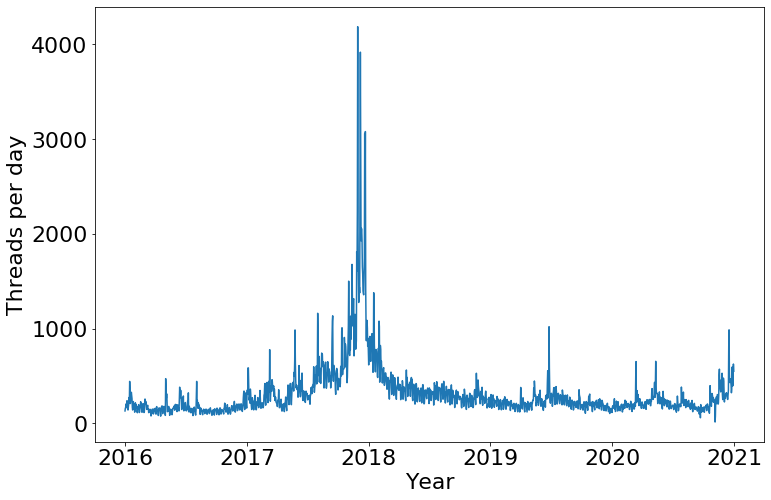

In [29]:
fig = plt.figure(figsize=(12,8))
plt.plot(day_df['New Threads'])
plt.xlabel('Year')
plt.ylabel('Threads per day')

So, what can be learned again? 
- Huge increase in commenting activity that rapidly fell down once the price dropped again. 
- However, a certain baseline stayed throughout the entire time. 
- One could thus think that there is a certain decomposition: people that follow Bitcoin because they are genuinely interested in the topic and people that follow/are active on Bitcoin because they are drawn by the number of tweets etc. 

# What about the threads? How many have a text, how many are only a file or so?

In [30]:
non_del = df[df['text'] != '[deleted]']

In [31]:
(non_del['text'] == 'nan').mean()

0.554713767145705

In [32]:
# Roughly 55% of all of the entries do not have a text, so a lot are just images/videos without an actual text

# If text, what's the length? 

In [33]:
text_df = pd.DataFrame(df[(df['text'] != 'nan') & (df['text'] != '[deleted]') & (df['text'] != '[removed]')]['text'])

In [34]:
text_df['TextLength'] = df['text'].apply(len)

In [35]:
text_df['TextLength'].describe()

count    177277.000000
mean        530.926539
std        1002.179866
min           1.000000
25%         142.000000
50%         288.000000
75%         575.000000
max       39490.000000
Name: TextLength, dtype: float64

Text(0, 0.5, 'Number of threads')

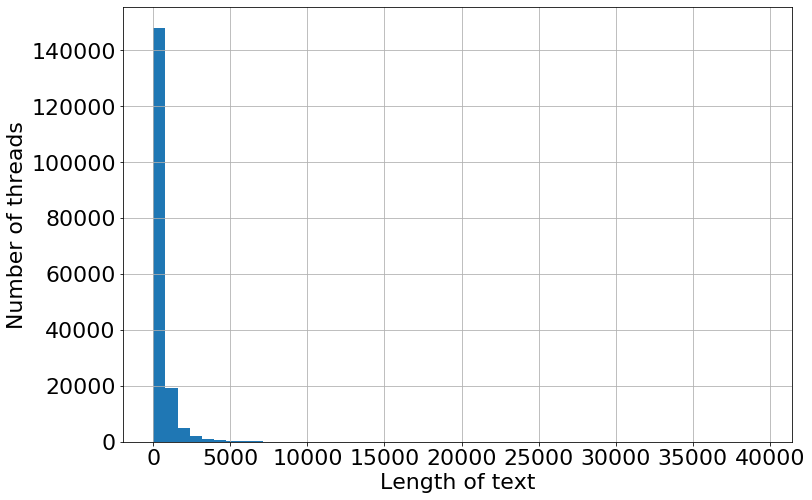

In [36]:
plt.figure(figsize=(12,8))
text_df['TextLength'].hist(bins=50);
plt.xlabel('Length of text');
plt.ylabel('Number of threads')

Very similar pattern again. 
- A lot of very short texts, only in the fewest cases does the text length go up.
- Very skewed distribution. 

# Ones/Twos Per Day

In [37]:
df

,id,timestamp,author,score,comments,title,text,Time,Day
0,3yyux2,1451606523,HodlDwon,1,0,Toomim BTCC Comment,nan,2016-01-01 00:02:03,2016-01-01
1,3yyvmp,1451606917,[deleted],63,149,They think Satoshi was wrong,[deleted],2016-01-01 00:08:37,2016-01-01
2,3yyx1b,1451607665,Bonleta,6,0,Bitcoin crowned best-performing currency of 2015,nan,2016-01-01 00:21:05,2016-01-01
3,3yyyoz,1451608583,wakka54,2,3,If there an automated program to search a hard...,I remember mining in 2010 but quit because it ...,2016-01-01 00:36:23,2016-01-01
4,3yyyqr,1451608613,camponez,1,3,Happy New 2016 FIAT!,nan,2016-01-01 00:36:53,2016-01-01
...,...,...,...,...,...,...,...,...,...
574618,ko0wkc,1609458770,BitcoinIsEasy,1,0,Look like for Idiots but its Amazing,nan,2020-12-31 23:52:50,2020-12-31
574619,ko0xpi,1609458893,idknooneknowsme,1,5,How to recover bitcoin,"So I’m actually not a n00b at all, I’m holding...",2020-12-31 23:54:53,2020-12-31
574620,ko0ycw,1609458963,Independent-Front860,1,0,"Defending Japan, the land of Satoshi Nakamoto ...",nan,2020-12-31 23:56:03,2020-12-31
574621,ko0yoo,1609458998,18gorrillas,1,1,I hear “down the rabbit hole” all the time.......,nan,2020-12-31 23:56:38,2020-12-31


In [38]:
author_df = pd.DataFrame(df['author'].value_counts())

In [39]:
df['Day'].unique()

array(['2016-01-01T00:00:00.000000000', '2016-01-02T00:00:00.000000000',
       '2016-01-03T00:00:00.000000000', ...,
       '2020-12-29T00:00:00.000000000', '2020-12-30T00:00:00.000000000',
       '2020-12-31T00:00:00.000000000'], dtype='datetime64[ns]')

In [40]:
newperday = pd.DataFrame(np.zeros((len(df['Day'].unique()),3)))
newperday.index = df['Day'].unique()
newperday.columns = ['1', '2', '3']
newperday

,1,2,3
2016-01-01,0.0,0.0,0.0
2016-01-02,0.0,0.0,0.0
2016-01-03,0.0,0.0,0.0
2016-01-04,0.0,0.0,0.0
2016-01-05,0.0,0.0,0.0
...,...,...,...
2020-12-27,0.0,0.0,0.0
2020-12-28,0.0,0.0,0.0
2020-12-29,0.0,0.0,0.0
2020-12-30,0.0,0.0,0.0


In [41]:
for i in range(df.shape[0]):
    day = df['Day'].iloc[i]
    author = df['author'].iloc[i]
    if author_df.loc[author].values[0] == 1:
        newperday.loc[day, '1'] += 1
    elif author_df.loc[author].values[0] == 2:
        newperday.loc[day, '2'] += 1
    elif author_df.loc[author].values[0] == 3:
        newperday.loc[day, '3'] += 1

    if i % 100000 == 0:
        print(i)

0
100000
200000
300000
400000
500000


Text(0.5, 1.0, 'Thread Frequency over Time')

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


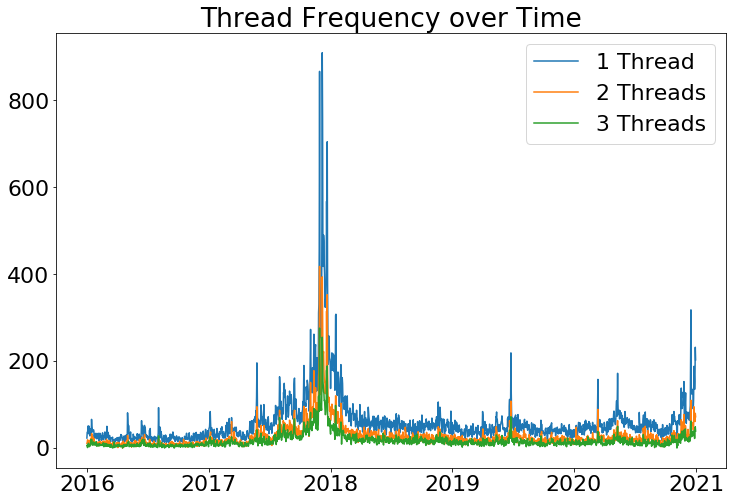

In [42]:
plt.figure(figsize=(12,8))
plt.plot(newperday[['1','2','3']])
plt.legend(['1 Thread', '2 Threads', '3 Threads'])
plt.title('Thread Frequency over Time')

In [43]:
author_df

,author
[deleted],46343
ms3776500,1703
cryptodailynews,1643
Daveliuz,1522
firecrypto,1470
...,...
RyanWithOak,1
MasterCryptKeep,1
monzzter221,1
yosh579,1


In [44]:
newperdaymax = pd.DataFrame(np.zeros((len(df['Day'].unique()),4)))
newperdaymax.index = df['Day'].unique()
newperdaymax.columns = ['46343', '1703', '1643', '1522']
newperdaymax

,46343,1703,1643,1522
2016-01-01,0.0,0.0,0.0,0.0
2016-01-02,0.0,0.0,0.0,0.0
2016-01-03,0.0,0.0,0.0,0.0
2016-01-04,0.0,0.0,0.0,0.0
2016-01-05,0.0,0.0,0.0,0.0
...,...,...,...,...
2020-12-27,0.0,0.0,0.0,0.0
2020-12-28,0.0,0.0,0.0,0.0
2020-12-29,0.0,0.0,0.0,0.0
2020-12-30,0.0,0.0,0.0,0.0


In [45]:
for i in range(df.shape[0]):
    day = df['Day'].iloc[i]
    author = df['author'].iloc[i]
    if author_df.loc[author].values[0] == 46343:
        newperdaymax.loc[day, '46343'] += 1
    elif author_df.loc[author].values[0] == 1703:
        newperdaymax.loc[day, '1703'] += 1
    elif author_df.loc[author].values[0] == 1643:
        newperdaymax.loc[day, '1643'] += 1
    elif author_df.loc[author].values[0] == 1522:
        newperdaymax.loc[day, '1522'] += 1

    if i % 100000 == 0:
        print(i)

0
100000
200000
300000
400000
500000


Text(0.5, 1.0, 'Threads by deleted Authors')

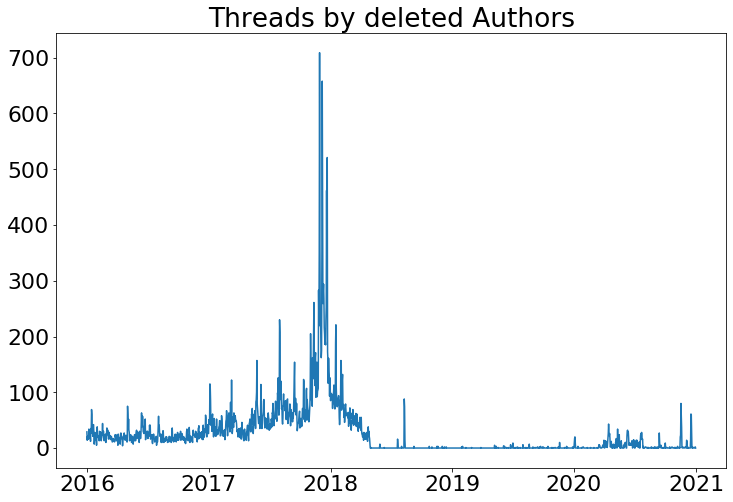

In [46]:
plt.figure(figsize=(12,8))
plt.plot(newperdaymax['46343'])
plt.title('Threads by deleted Authors')

Text(0.5, 1.0, 'Thread Frequency over Time')

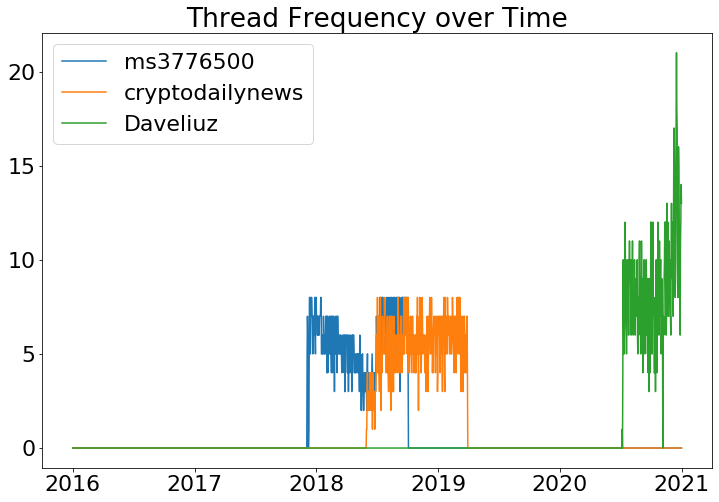

In [47]:
plt.figure(figsize=(12,8))
plt.plot(newperdaymax[['1703','1643', '1522']])
plt.legend(['ms3776500', 'cryptodailynews', 'Daveliuz'])
plt.title('Thread Frequency over Time')

# Comments per Thread and Comments per Day

In [95]:
# Comments per Thread

In [118]:
coms = pd.DataFrame(df['comments'].value_counts()).sort_index()

# Total Comments per Category
t_coms = []
for i in range(coms.shape[0]):
    t_coms.append(coms['comments'].iloc[i] * coms.index[i])
coms['total comments'] = t_coms

# Total Comments per Category (cumulative)
t_coms_cumul = [0]
for i in range(1,len(t_coms)):
    a = t_coms_cumul[-1]
    a += coms['total comments'].iloc[i]
    t_coms_cumul.append(a)
    
coms['total comments cumulative'] = t_coms_cumul

# Total Comments per Categroy (cumulative percentage)
coms['Cumulative Percentage'] = t_coms_cumul

def cumul_pct(elem):
    elem = elem / t_coms_cumul[-1]
    return elem

coms['Cumulative Percentage'] = coms['Cumulative Percentage'].apply(cumul_pct)

# Percentage occurence 

temp_help = coms['comments'].sum()

def pct_occurrence(elem):
    elem = elem / temp_help
    return elem

coms['Thread Category Percentage'] = coms['comments'].apply(pct_occurrence)

tcp_cumul_pct = [0.347758]
for elem in coms['Thread Category Percentage'].iloc[1:]:
    a = tcp_cumul_pct[-1]
    a += elem
    tcp_cumul_pct.append(a)
    
coms['Thread Category Cumulative Percentage'] = tcp_cumul_pct

coms

,comments,total comments,total comments cumulative,Cumulative Percentage,Thread Category Percentage,Thread Category Cumulative Percentage
0,199830,0,0,0.000000,0.347758,0.347758
1,71390,71390,71390,0.011720,0.124238,0.471996
2,42298,84596,155986,0.025608,0.073610,0.545606
3,31476,94428,250414,0.041109,0.054777,0.600383
4,26360,105440,355854,0.058419,0.045874,0.646256
...,...,...,...,...,...,...
3658,1,3658,6070696,0.996600,0.000002,0.999993
4291,1,4291,6074987,0.997305,0.000002,0.999994
4351,1,4351,6079338,0.998019,0.000002,0.999996
4941,1,4941,6084279,0.998830,0.000002,0.999998


Text(0, 0.5, 'Cumulative Percentage')

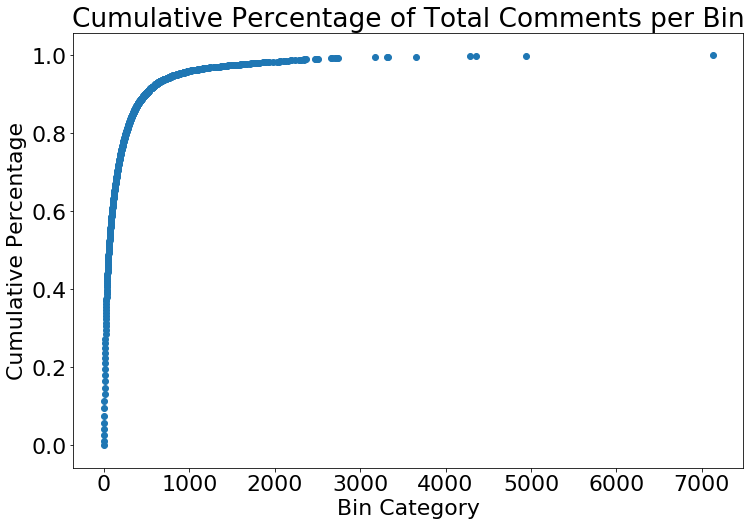

In [128]:
plt.figure(figsize=(12,8))
plt.scatter(coms.index, coms['Cumulative Percentage'])
plt.title('Cumulative Percentage of Total Comments per Bin')
plt.xlabel('Bin Category')
plt.ylabel('Cumulative Percentage')

Text(0, 0.5, 'Cumulative Percentage')

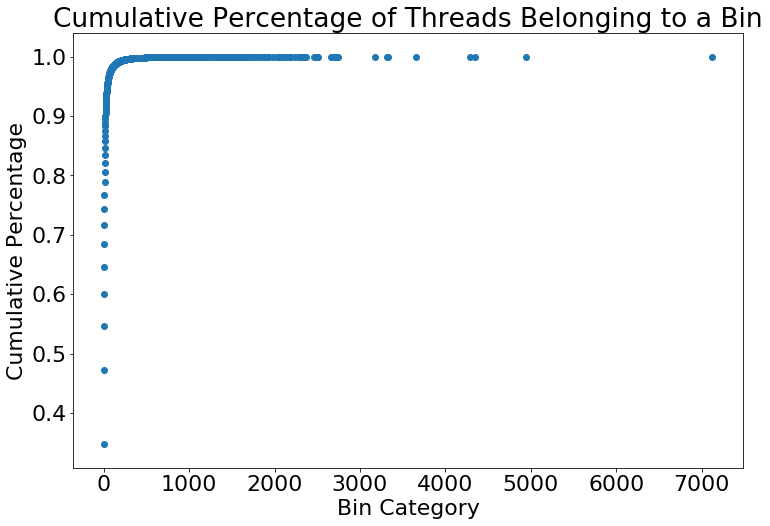

In [129]:
plt.figure(figsize=(12,8))
plt.scatter(coms.index, coms['Thread Category Cumulative Percentage'])
plt.title('Cumulative Percentage of Threads Belonging to a Bin')
plt.xlabel('Bin Category')
plt.ylabel('Cumulative Percentage')

In [52]:
# Comments per Day

In [125]:
pd.DataFrame(df.groupby('Day').sum()['comments'])
# day_df

,comments
Day,
2016-01-01,1588.0
2016-01-02,1625.0
2016-01-03,1661.0
2016-01-04,1690.0
2016-01-05,2479.0
...,...
2020-12-27,6125.0
2020-12-28,5376.0
2020-12-29,5932.0
